<a href="https://colab.research.google.com/github/Mayank-goyal2424/Learning.it/blob/master/3_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Convolutional Neural Network

###  Importing packages

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Preparing Dataset

In [0]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

### Model Training

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 324us/step - loss: 0.7070 - accuracy: 0.7654 - val_loss: 0.1393 - val_accuracy: 0.9573


### Testing

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13930404947400093
Test accuracy: 0.9573000073432922


### Prediction

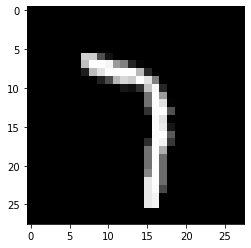

In [0]:
import pylab as plt

plt.imshow(x_test[122].reshape(28,28),cmap='gray')
plt.show()

In [0]:
import numpy as np
prediction = model.predict(x_test[122:123])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [5.3363472e-08 1.0395054e-06 2.4429252e-04 7.0416587e-05 1.9248107e-07
 1.3470260e-08 7.6862051e-11 9.9760360e-01 5.7101926e-07 2.0798268e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit:
 7


# Part 2: Applications of Convolutional Neural Network

###  MobileNet Models

In [0]:
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model.summary()

2113536/2108140 [==============================] - 0s 0us/step
Model: "mobilenet_0.25_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 8)       216       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 8)       32        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 8)       0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)       72        
___________________________________________________

###  Classify images

In [0]:
# Write the image name below

img_path = 'digit.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

40960/35363 [==================================] - 0s 0us/step
Predicted:
 [[('n04286575', 'spotlight', 0.12874618), ('n03729826', 'matchstick', 0.12555717), ('n03666591', 'lighter', 0.07316683), ('n03804744', 'nail', 0.046444528), ('n01833805', 'hummingbird', 0.028863667)]]


###  Extract CNN features

In [0]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)


Feature Shape:
 (1, 1000)

Features:
 [[5.09006270e-07 5.94694902e-05 1.22426078e-04 6.39697610e-05
  1.59257930e-03 1.24230901e-05 2.77952531e-05 1.87597743e-05
  8.02539580e-06 2.07948633e-05 4.91978335e-06 4.08514052e-06
  1.52590155e-06 1.60168383e-05 5.71166602e-05 7.40705673e-07
  1.56035559e-04 1.19449942e-04 2.47571780e-03 6.10597606e-04
  8.92567405e-05 4.35895257e-04 2.58736662e-04 3.67147266e-04
  5.16561886e-06 2.27296437e-06 1.61252883e-05 1.48671306e-05
  1.93650594e-05 8.56805855e-05 1.22397000e-06 3.10444331e-04
  6.86992353e-05 2.66887364e-05 8.40058274e-05 5.35491881e-06
  6.48528803e-05 1.43448835e-06 4.29752097e-03 5.35796880e-06
  9.46440152e-04 1.66752834e-05 4.81307734e-06 1.96784124e-04
  3.04561599e-05 7.42507723e-07 5.33687649e-04 4.93118656e-04
  3.87759258e-07 4.65441781e-06 5.02025341e-06 2.64336322e-05
  2.16326625e-05 2.74045451e-05 6.43131034e-06 1.85562330e-05
  2.55289051e-04 4.49058319e-08 2.38029206e-05 8.60267173e-05
  6.81424208e-05 4.63249535e-07

###  Extract features from an arbitrary intermediate layer

In [0]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

Features of conv_dw_2_relu: (1, 56, 56, 16)


### You can extract these features and use the base network as a feature extractor for your problems. 

## Part 3: Design Choices in Convolutional Neural Networks

## Influence of convolution size

### Model with (3 x 3) Convolution

In [0]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 34s 574

### Model with (7 x 7) Convolution

In [0]:
# Write your code here 

# Use the same model design from the above cell 

## Striding

### Model with (7 x 7) Convolution with 2 Steps

In [0]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 11, 11, 8)         400       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 16)          6288      
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4640      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 11,658
Trainable params: 11,658
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 10s - loss: 0.4857 - acc: 0.853

## Padding

### Model with (7 x 7) Convolution with Same Padding

In [0]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         400       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        6288      
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 408,458
Trainable params: 408,458
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 199s - loss: 0.2605 - acc: 0.

## Pooling

### Model with (3 x 3) Convolution with Pooling (2 x 2) 

In [0]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total para

### Model with (3 x 3) Convolution with Pooling (3 x 3) 

In [0]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?